In [210]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [48]:
df = pd.read_csv("koi.csv")

In [49]:
df.head(5)

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [50]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

Dropping all the irrelevant columns - identifiers, light curve fit errors, etc

In [177]:
drop_cols = [
    "kepid", "kepoi_name", "kepler_name",
    "koi_pdisposition", "koi_score", "koi_tce_delivname",
    "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec",
    "koi_time0bk", 'koi_model_snr', 'koi_tce_plnt_num', 'ra', 'dec', 'koi_kepmag'
]

err_cols = [c for c in df.columns if c.endswith("_err1") or c.endswith("_err2")]

df1 = df.drop(columns = drop_cols + err_cols, errors="ignore")

#df1 = df.drop(columns=["kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", 'koi_tce_plnt_num', "koi_tce_delivname"], errors="ignore")

In [178]:
df1.columns

Index(['koi_disposition', 'koi_period', 'koi_impact', 'koi_duration',
       'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff',
       'koi_slogg', 'koi_srad'],
      dtype='object')

In [179]:
df1.head(5)

,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
0,CONFIRMED,9.488036,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927
1,CONFIRMED,54.418383,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927
2,CANDIDATE,19.899140,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868
3,FALSE POSITIVE,1.736952,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791
4,CONFIRMED,2.525592,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046


In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   koi_disposition  9564 non-null   object 
 1   koi_period       9564 non-null   float64
 2   koi_impact       9201 non-null   float64
 3   koi_duration     9564 non-null   float64
 4   koi_depth        9201 non-null   float64
 5   koi_prad         9201 non-null   float64
 6   koi_teq          9201 non-null   float64
 7   koi_insol        9243 non-null   float64
 8   koi_steff        9201 non-null   float64
 9   koi_slogg        9201 non-null   float64
 10  koi_srad         9201 non-null   float64
dtypes: float64(10), object(1)
memory usage: 822.0+ KB


In [181]:
miss_per_col = df1.isna().mean()*100
print("Missing % per column:\n", miss_per_col)

Missing % per column:
 koi_disposition    0.000000
koi_period         0.000000
koi_impact         3.795483
koi_duration       0.000000
koi_depth          3.795483
koi_prad           3.795483
koi_teq            3.795483
koi_insol          3.356336
koi_steff          3.795483
koi_slogg          3.795483
koi_srad           3.795483
dtype: float64


In [182]:
complete = df1.dropna()
incomplete = df1[df1.isna().any(axis=1)]

comp_dist = complete['koi_disposition'].value_counts(normalize=True)
incomp_dist = incomplete['koi_disposition'].value_counts(normalize=True)

print("Complete data disposition distribution:\n", comp_dist)
print("\nIncomplete data disposition distribution:\n", incomp_dist)

Complete data disposition distribution:
 koi_disposition
FALSE POSITIVE    0.497989
CONFIRMED         0.298228
CANDIDATE         0.203782
Name: proportion, dtype: float64

Incomplete data disposition distribution:
 koi_disposition
FALSE POSITIVE    0.707989
CANDIDATE         0.286501
CONFIRMED         0.005510
Name: proportion, dtype: float64


In [183]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df1['koi_disposition'], df1.isna().any(axis=1))
chi2, p, dof, expected = chi2_contingency(table)
p


np.float64(1.7869303561526572e-32)

In [184]:
print(df1["koi_disposition"].value_counts())

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


EDA

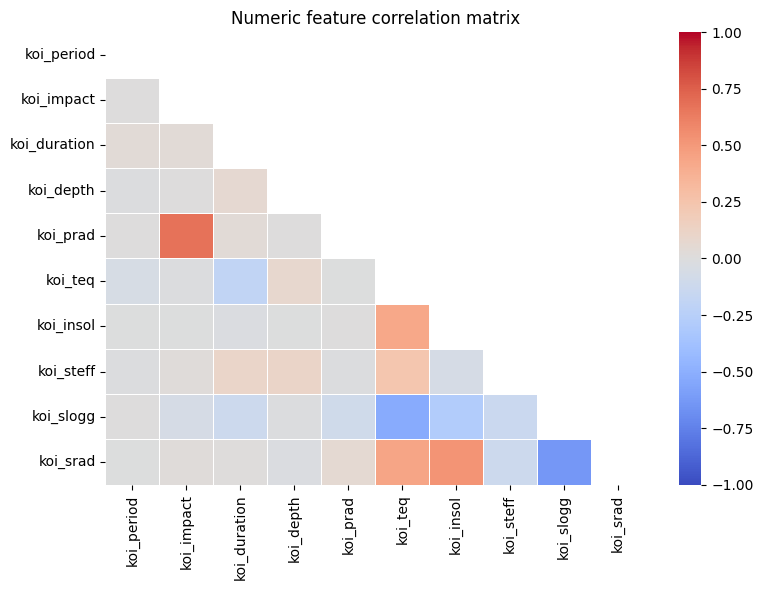

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# numeric correlation heatmap
num_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
corr = df1[num_cols].corr()

plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt=".2f", linewidths=.5)
plt.title('Numeric feature correlation matrix')
plt.tight_layout()
plt.show()


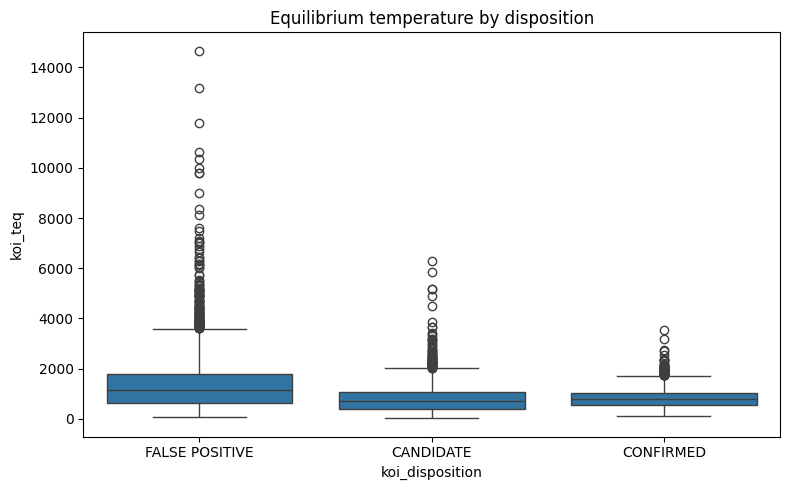

Kruskal-Wallis H-statistic = 753.6742533682893 p-value = 2.196419571013264e-164


In [199]:
import scipy.stats as st

col = 'koi_teq'            # equilibrium temperature
label = 'koi_disposition'  # disposition

# boxplot / violin
plt.figure(figsize=(8,5))
sns.boxplot(x=label, y=col, data=df1, order=['FALSE POSITIVE','CANDIDATE','CONFIRMED'])
plt.yscale('symlog' if (df1[col] > 0).all() and df1[col].skew() > 2 else 'linear')
plt.title('Equilibrium temperature by disposition')
plt.tight_layout()
plt.show()

# statistical test: Kruskal-Wallis (non-parametric ANOVA)
groups = [g[col].dropna().values for _, g in df1.groupby(label)]
stat, p = st.kruskal(*groups)
print('Kruskal-Wallis H-statistic =', stat, 'p-value =', p)


koi_impact         0.037955
koi_prad           0.037955
koi_depth          0.037955
koi_srad           0.037955
koi_slogg          0.037955
koi_teq            0.037955
koi_steff          0.037955
koi_insol          0.033563
koi_disposition    0.000000
koi_period         0.000000
koi_duration       0.000000
dtype: float64


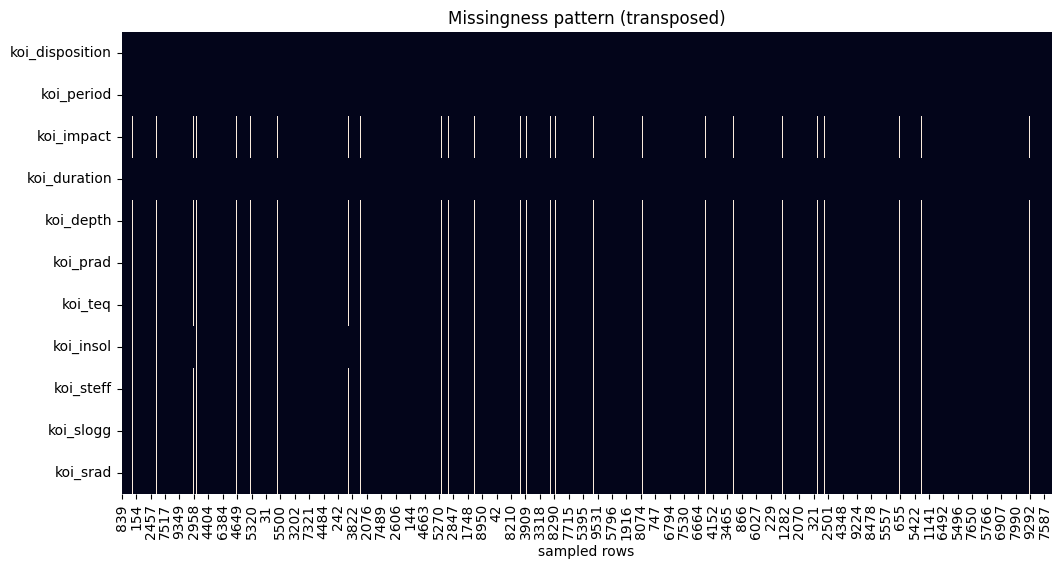

In [200]:
# percent missing per column
missing = df1.isna().mean().sort_values(ascending=False)
print(missing.head(30))

# missingness heatmap (sample rows if large)
sample = df1.sample(n=2000, random_state=0) if len(df1)>2000 else df1
plt.figure(figsize=(12,6))
sns.heatmap(sample.isna().T, cbar=False)
plt.xlabel('sampled rows')
plt.title('Missingness pattern (transposed)')
plt.show()


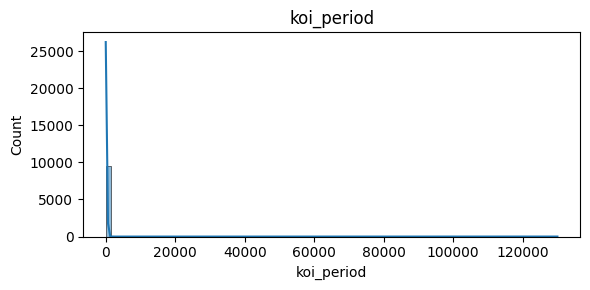

koi_period skew= 96.45932619713726


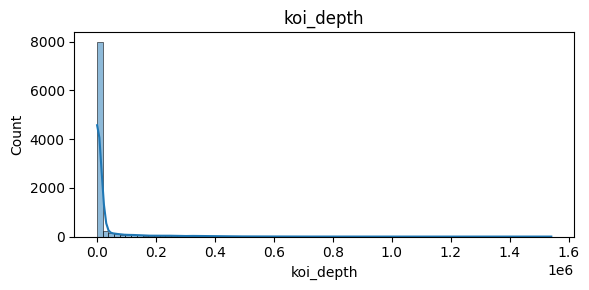

koi_depth skew= 5.260651582701501


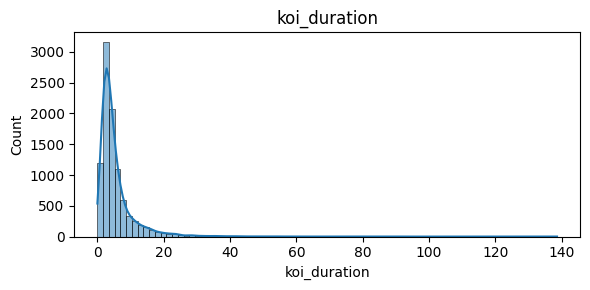

koi_duration skew= 5.928764863565197


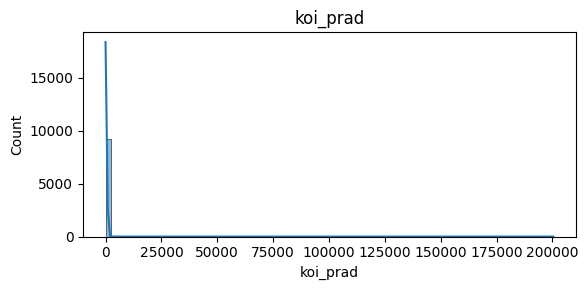

koi_prad skew= 52.11895420603228


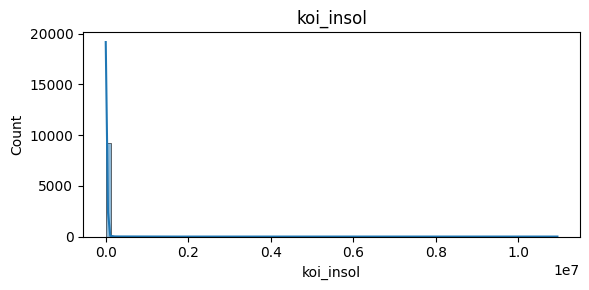

koi_insol skew= 49.947776674047304


In [202]:
candidates = ['koi_period','koi_depth','koi_duration','koi_prad','koi_insol']
for c in candidates:
    if c in df1.columns:
        plt.figure(figsize=(6,3))
        sns.histplot(df1[c].dropna(), kde=True, bins=80)
        plt.title(c)
        plt.tight_layout()
        plt.show()
        print(c, 'skew=', df1[c].dropna().skew())


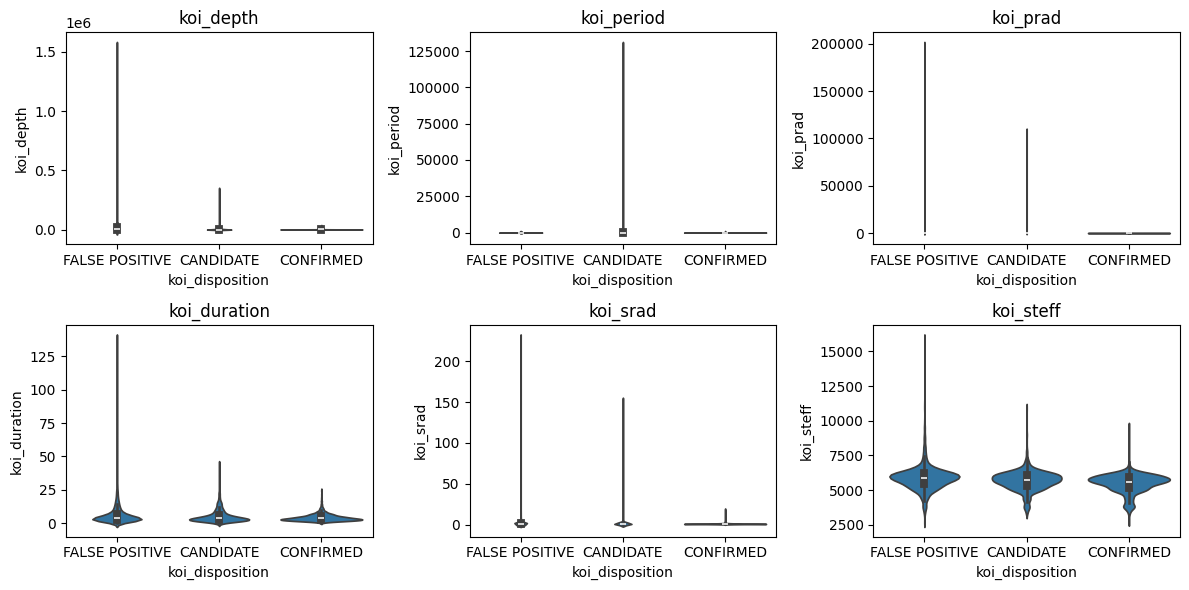

In [204]:
top_features = ['koi_depth','koi_period','koi_prad','koi_duration','koi_srad','koi_steff']
exist = [f for f in top_features if f in df1.columns]
plt.figure(figsize=(12,6))
for i,f in enumerate(exist):
    plt.subplot(2, int(np.ceil(len(exist)/2)), i+1)
    sns.violinplot(x='koi_disposition', y=f, data=df1, order=['FALSE POSITIVE','CANDIDATE','CONFIRMED'])
    plt.title(f)
plt.tight_layout()
plt.show()


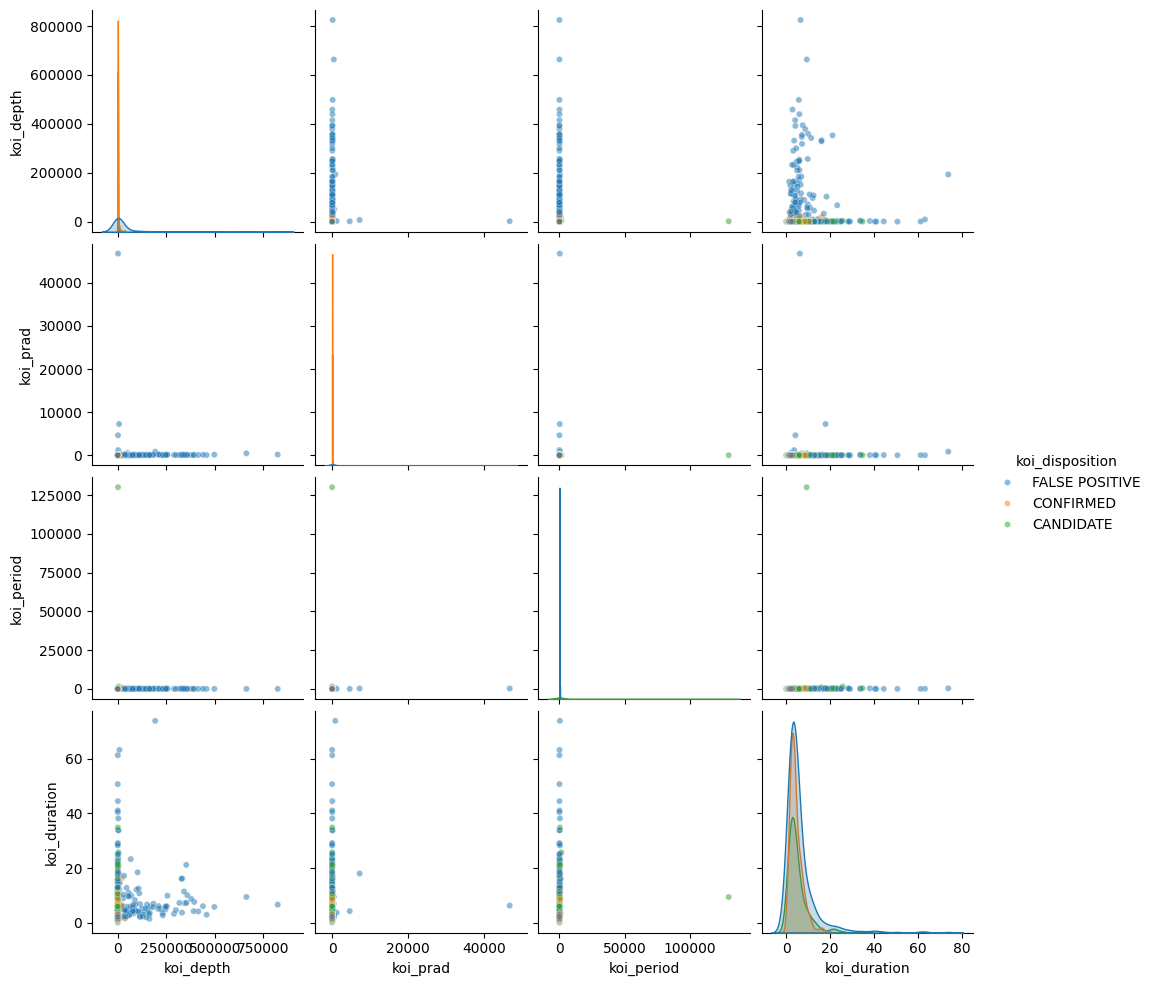

In [206]:
sample = df1.sample(n=1000, random_state=0)
cols = ['koi_depth','koi_prad','koi_period','koi_duration']
cols = [c for c in cols if c in sample.columns]
sns.pairplot(sample[cols + ['koi_disposition']], hue='koi_disposition', vars=cols, plot_kws={'alpha':0.5,'s':20})
plt.show()


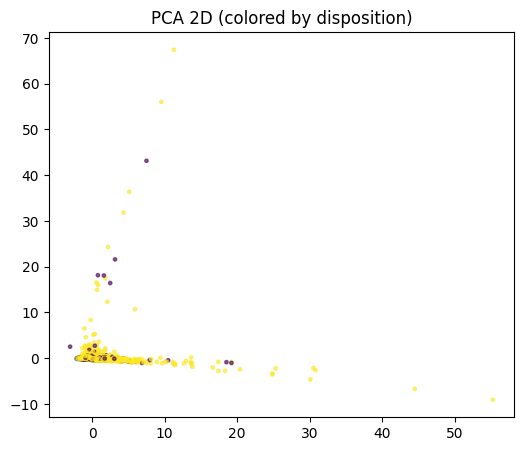

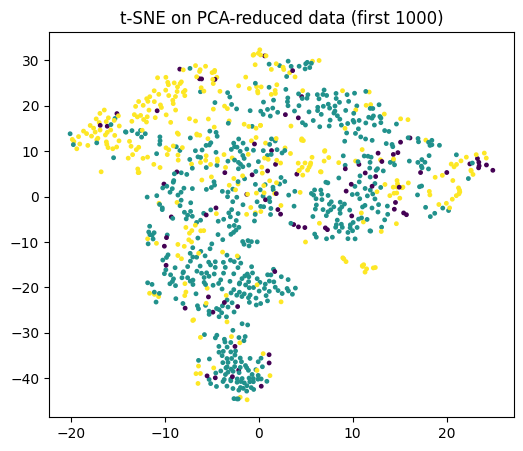

In [208]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

features = df1.select_dtypes(include=[np.number]).columns.drop(['kepid'], errors='ignore')
X = df1[features].copy()
# simple median impute for visualization only
X = X.fillna(X.median())
X = (X - X.mean())/X.std()

pca = PCA(n_components=10, random_state=0).fit_transform(X)
plt.figure(figsize=(6,5))
plt.scatter(pca[:,0], pca[:,1], c=pd.Categorical(df1['koi_disposition']).codes, s=6, alpha=0.6)
plt.title('PCA 2D (colored by disposition)')
plt.show()

tsne = TSNE(n_components=2, random_state=0, init='pca', perplexity=50).fit_transform(pca[:1000])
plt.figure(figsize=(6,5))
plt.scatter(tsne[:,0], tsne[:,1], c=pd.Categorical(df1['koi_disposition'].iloc[:1000]).codes, s=6)
plt.title('t-SNE on PCA-reduced data (first 1000)')
plt.show()


In [209]:
df1['has_missing'] = df1.isna().any(axis=1).astype(int)
ct = pd.crosstab(df1['has_missing'], df1['koi_disposition'], normalize='index')
print(ct)
# Chi-square test
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df1['has_missing'], df1['koi_disposition']))
print('chi2',chi2,'p',p)


koi_disposition  CANDIDATE  CONFIRMED  FALSE POSITIVE
has_missing                                          
0                 0.203782   0.298228        0.497989
1                 0.286501   0.005510        0.707989
chi2 146.20444742577186 p 1.7869303561526572e-32


In [215]:
# test whether koi_depth differs by disposition (non-parametric)
groups = [g['koi_depth'].dropna().values for _, g in df1.groupby('koi_disposition')]
stat, p = st.kruskal(*groups)
print('koi_depth Kruskal-Wallis p=', p)

koi_depth Kruskal-Wallis p= 3.434726264336258e-101


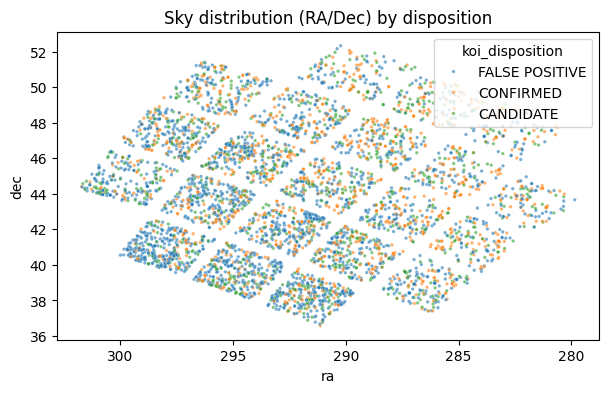

In [216]:
if 'ra' in df.columns and 'dec' in df.columns:
    plt.figure(figsize=(7,4))
    sns.scatterplot(data=df.sample(5000, random_state=0), x='ra', y='dec', hue='koi_disposition', s=6, alpha=0.6)
    plt.title('Sky distribution (RA/Dec) by disposition')
    plt.gca().invert_xaxis()  # optional, RA convention
    plt.show()


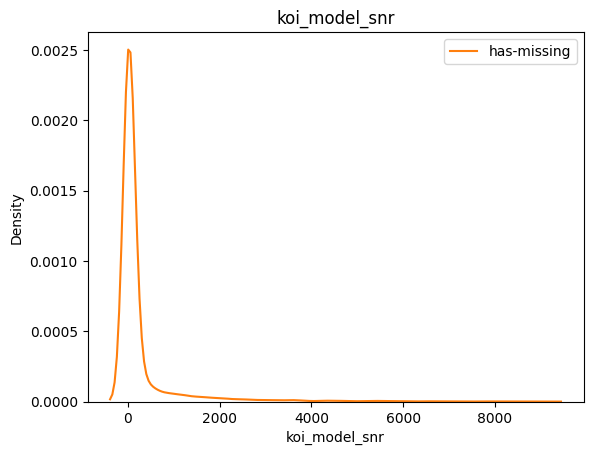

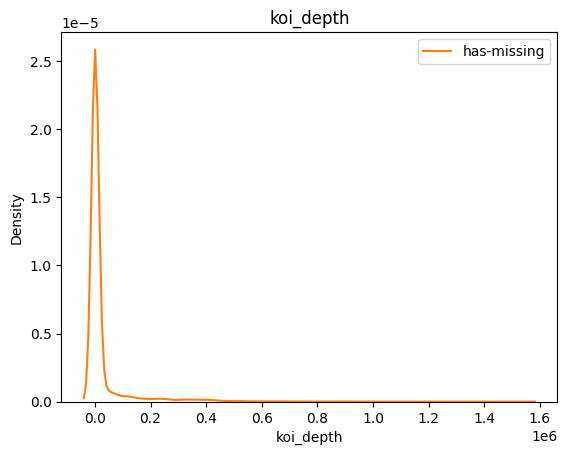

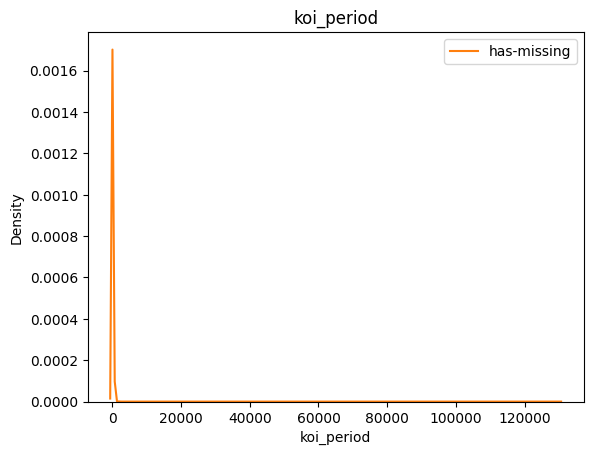

In [217]:
# compare distributions between dropped rows and kept rows
drop_mask = df.isna().any(axis=1)
for c in ['koi_model_snr','koi_depth','koi_period']:
    if c in df.columns:
        sns.kdeplot(df.loc[~drop_mask, c].dropna(), label='no-missing')
        sns.kdeplot(df.loc[drop_mask, c].dropna(), label='has-missing')
        plt.title(c)
        plt.legend(); plt.show()


In [185]:
from sklearn.model_selection import train_test_split

x = df1.drop(columns=["koi_disposition"], errors="ignore")
y = df1["koi_disposition"]

x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state=42)

In [186]:
x_train.head(5)

,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad
8117,0.580725,0.292,1.8200,64.2,0.75,2191.0,5418.89,5989.0,4.492,0.933
5245,14.532605,0.112,2.4212,328.9,1.69,746.0,73.37,6003.0,4.507,0.932
5865,1.339670,0.602,1.8950,28.6,1.27,3448.0,33385.02,8867.0,3.988,2.245
4050,160.412202,0.903,4.9200,2538.0,4.45,270.0,1.26,5269.0,4.620,0.727
5130,11.937835,0.036,4.6520,246.0,1.15,671.0,47.91,5469.0,4.611,0.738


In [187]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7651, 10)
(1913, 10)
(7651,)
(1913,)


In [188]:
y_train.head(5)

8117    FALSE POSITIVE
5245         CONFIRMED
5865    FALSE POSITIVE
4050    FALSE POSITIVE
5130         CANDIDATE
Name: koi_disposition, dtype: object

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec  = recall_score(y_test, y_pred, average='macro')
f1   = f1_score(y_test, y_pred, average='macro')

print(acc, prec, rec, f1)
print(classification_report(y_test, y_pred))

0.7255619445896497 0.6680877461591258 0.6646979332550803 0.6634338492539653
                precision    recall  f1-score   support

     CANDIDATE       0.47      0.36      0.41       405
     CONFIRMED       0.74      0.79      0.76       569
FALSE POSITIVE       0.80      0.84      0.82       939

      accuracy                           0.73      1913
     macro avg       0.67      0.66      0.66      1913
  weighted avg       0.71      0.73      0.72      1913



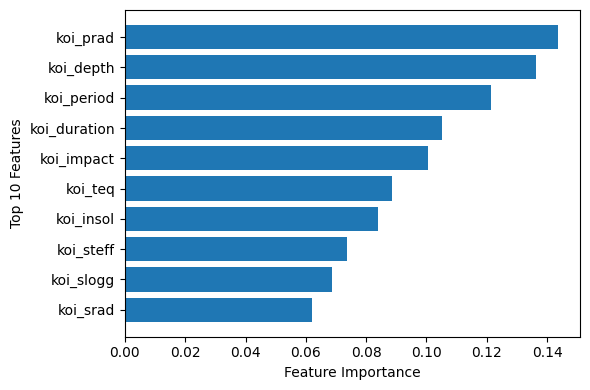

In [ ]:

# After fitting the pipeline
rf = pipe.named_steps['clf']

# If using SimpleImputer with add_indicator=True, get the expanded feature names

feature_names = np.array(x_train.columns)
imputer = pipe.named_steps['imputer']
feature_names = imputer.get_feature_names_out(feature_names)

importances = rf.feature_importances_

imputer = pipe.named_steps['imputer']
feature_names = imputer.get_feature_names_out(x_train.columns)

idx = np.argsort(importances)[-10:]   # top 10
top_features = feature_names[idx]
top_importances = importances[idx]

plt.figure(figsize=(6, 4))
plt.barh(top_features, top_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Top 10 Features")
plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier

# pipe = Pipeline([
#     ('imp', SimpleImputer(strategy='median', add_indicator=True)),
#     ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
# ])

# param_grid = {
#     'clf__n_estimators': [200, 400, 600],
#     'clf__max_depth': [6, 8, 10, None],
#     'clf__min_samples_split': [2, 5, 10],
#     'clf__min_samples_leaf': [1, 2, 4]
# }

# grid = GridSearchCV(
#     pipe,
#     param_grid,
#     scoring='f1_macro',
#     cv=5,
#     n_jobs=-1
# )

# grid.fit(x_train, y_train)
# best_model = grid.best_estimator_

# y_pred = best_model.predict(x_test)

# from sklearn.metrics import classification_report
# print(grid.best_params_)
# print(classification_report(y_test, y_pred))

{'clf__max_depth': None, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 600}
                precision    recall  f1-score   support

     CANDIDATE       0.49      0.53      0.51       396
     CONFIRMED       0.72      0.79      0.75       549
FALSE POSITIVE       0.86      0.78      0.82       968

      accuracy                           0.73      1913
     macro avg       0.69      0.70      0.69      1913
  weighted avg       0.74      0.73      0.74      1913



In [163]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

x_train, x_test, y_train_enc, y_test_enc = train_test_split(
    x, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)


In [164]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
    ('clf', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        num_class=3,
        max_depth=6,
        n_estimators=600,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipe.fit(x_train, y_train_enc)
y_pred_enc = pipe.predict(x_test)

acc  = accuracy_score(y_test_enc, y_pred_enc)
prec = precision_score(y_test_enc, y_pred_enc, average='macro')
rec  = recall_score(y_test_enc, y_pred_enc, average='macro')
f1   = f1_score(y_test_enc, y_pred_enc, average='macro')

print(acc, prec, rec, f1)
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))


0.7425312330255296 0.6894956918212732 0.6891416918106944 0.6889188323740666
                precision    recall  f1-score   support

     CANDIDATE       0.48      0.44      0.46       375
     CONFIRMED       0.75      0.79      0.77       549
FALSE POSITIVE       0.83      0.84      0.84       917

      accuracy                           0.74      1841
     macro avg       0.69      0.69      0.69      1841
  weighted avg       0.74      0.74      0.74      1841



In [167]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier

pipe = Pipeline([
    ('imp', SimpleImputer(strategy='median', add_indicator=True)),
    ('clf', LGBMClassifier(
        objective='multiclass',
        num_class=3,
        n_estimators=700,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        class_weight='balanced',
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipe.fit(x_train, y_train_enc)
y_pred_enc = pipe.predict(x_test)
print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))


                precision    recall  f1-score   support

     CANDIDATE       0.48      0.55      0.51       375
     CONFIRMED       0.76      0.78      0.77       549
FALSE POSITIVE       0.86      0.80      0.83       917

      accuracy                           0.74      1841
     macro avg       0.70      0.71      0.70      1841
  weighted avg       0.76      0.74      0.75      1841



c:\Users\KIIT0001\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [165]:
from collections import Counter

counts = Counter(y_train_enc)
total = sum(counts.values())
num_classes = len(counts)

class_weights = [total / (num_classes * counts[i]) for i in range(num_classes)]
class_weights

[1.6355555555555557, 1.117691723614275, 0.6693951796271033]

In [166]:
from catboost import CatBoostClassifier

pipe = Pipeline([
    ('imp', SimpleImputer(strategy='median', add_indicator=True)),
    ('clf', CatBoostClassifier(
        loss_function='MultiClass',
        iterations=800,
        depth=7,
        learning_rate=0.05,
        class_weights=class_weights,
        verbose=False,
        random_seed=42
    ))
])

pipe.fit(x_train, y_train_enc)
y_pred_enc = pipe.predict(x_test)

print(classification_report(y_test_enc, y_pred_enc, target_names=le.classes_))


                precision    recall  f1-score   support

     CANDIDATE       0.45      0.61      0.52       375
     CONFIRMED       0.78      0.78      0.78       549
FALSE POSITIVE       0.88      0.75      0.81       917

      accuracy                           0.73      1841
     macro avg       0.70      0.71      0.70      1841
  weighted avg       0.76      0.73      0.74      1841

